In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import spacy
from spacy.lang.es.examples import sentences 


nlp = spacy.load('C:\ProgramData\Miniconda3\Lib\site-packages\es_core_news_lg\es_core_news_lg-3.2.0')

In [4]:
tweets = pd.read_csv("tweets_volcan_es_2.csv", header=None, names=['tweet'], encoding='latin-1')
tweets = tweets.dropna()
tweets.columns = [ 'text']

tweets.drop_duplicates(subset ='text', keep = False, inplace = True) 
tweets.head()

,text
1,b'@rajote Ciertamente no veo protestas por el ...
2,"b'Terremoto de 4,9 en la isla espanola del vol..."
3,b'@EmmaRincon Por favor no puedo leer estas co...
4,"b'Ademas, el sismografo del Instituto Geografi..."
5,"b'Con respecto a que estadio pesa mas,si el vo..."


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 1 to 5626
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5512 non-null   object
dtypes: object(1)
memory usage: 86.1+ KB


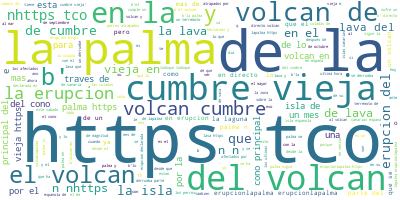

In [6]:
import re
# Remove punctuation

tweets['paper_text_processed'] = \
tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
tweets['paper_text_processed'] = \
tweets['paper_text_processed'].map(lambda x: x.lower())

# Remove stop words?¿?¿?¿
#import re
#from nltk.corpus import stopwords

#important_words=[]
#for paper in papers:
 #   if paper not in stopwords.words('spanish'):
  #      important_words.append(papers)

#print (important_words)

# Print out the first rows of papers
tweets['paper_text_processed'].head()
#!pip install wordcloud
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.

long_string = ','.join(list(tweets['paper_text_processed'].values))
#long_string = ','.join(list(papers['important_words'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [43]:
from spacy.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.es.stop_words import STOP_WORDS as es_stop
from nltk.tokenize import word_tokenize
all_stopwords = nlp.Defaults.stop_words
print(all_stopwords)

#final_stopwords_list = list(es_stop) 
#tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words=final_stopwords_list, use_idf=True, tokenizer=nlp.tokenizer)

tokenizer = nlp.tokenizer
aux=word_tokenize(long_string)
text_tokens = tokenizer(long_string)
print(len(text_tokens))
#print(text_tokens)
tokens_without_sw= [word for word in aux if not word in all_stopwords]
print(len(tokens_without_sw))
#print(tokens_without_sw)
#tokens_without_sw= [word for word in tfidf_vectorizer if not word in all_stopwords]
#print(tokens_without_sw)

{'nosotras', 'sí', 'solo', 'último', 'agregó', 'hizo', 'varias', 'pasado', 'intentas', 'estado', 'sea', 'un', 'era', 'cuantas', 'alguno', 'habia', 'aunque', 'bien', 'enseguida', 'debido', 'mia', 'qeu', 'pero', 'para', 'allí', 'cuales', 'despues', 'segun', 'nos', 'estan', 'sabemos', 'emplean', 'será', 'tercera', 'todos', 'tuvo', 'dar', 'sabe', 'aún', 'medio', 'próximos', 'tú', 'me', 'cual', 'delante', 'ejemplo', 'cuánta', 'está', 'conocer', 'quien', 'salvo', 'vais', 'contra', 'gueno', 'nuestra', 'ocho', 'expresó', 'hoy', 'solos', 'tenga', 'tarde', 'sido', 'verdadera', 'propios', 'mismas', 'tengo', 'ninguna', 'empleo', 'mio', 'dias', 'aquél', 'vaya', 'solamente', 'ahí', 'pocas', 'final', 'considera', 'hago', 'en', 'yo', 'cierto', 'otro', 'dio', 'cuatro', 'deben', 'última', 'algunos', 'los', 'incluso', 'pues', 'todavia', 'queremos', 'tu', 'voy', 'eran', 'nada', 'dentro', 'aquello', 'emplear', 'partir', 'temprano', 'nosotros', 'sin', 'mientras', 'general', 'haber', 'debajo', 'habrá', 'he',

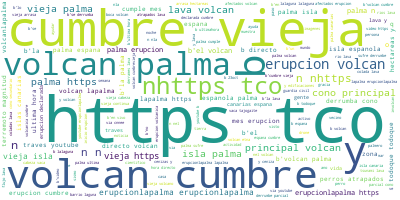

In [42]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
unique_string=(" ").join(tokens_without_sw)
#wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
# Generate a word cloud
#text2= "".join(tokens_without_sw)
#text2 = bytearray([self.byte_decoder[c] for c in text]).decode("utf-8", errors=self.errors)
#long_string2 = ','.join(list(tokens_without_sw['paper_text_processed'].values))
#!pip install nltk
#text2=''.join(token.text_with_ws for token in tokens_without_sw)
#from nltk.tokenize.treebank import TreebankWordDetokenizer
#text2=TreebankWordDetokenizer().detokenize([tokens_without_sw])
wordcloud.generate(unique_string)
# Visualize the word cloud
wordcloud.to_image()

In [44]:
new_stop_words={'nosotras', 'sí', 'solo', 'último', 'agregó', 'hizo', 'varias', 'pasado', 'intentas', 'estado', 'sea', 'un', 'era', 'cuantas', 
                'alguno', 'habia', 'aunque', 'bien', 'enseguida', 'debido', 'mia', 'qeu', 'pero', 'para', 'allí', 'cuales', 'despues', 'segun', 
                'nos', 'estan', 'sabemos', 'emplean', 'será', 'tercera', 'todos', 'tuvo', 'dar', 'sabe', 'aún', 'medio', 'próximos', 'tú', 'me', 
                'cual', 'delante', 'ejemplo', 'cuánta', 'está', 'conocer', 'quien', 'salvo', 'vais', 'contra', 'gueno', 'nuestra', 'ocho', 'expresó', 
                'hoy', 'solos', 'tenga', 'tarde', 'sido', 'verdadera', 'propios', 'mismas', 'tengo', 'ninguna', 'empleo', 'mio', 'dias', 'aquél', 'vaya', 
                'solamente', 'ahí', 'pocas', 'final', 'considera', 'hago', 'en', 'yo', 'cierto', 'otro', 'dio', 'cuatro', 'deben', 'última', 'algunos', 
                'los', 'incluso', 'pues', 'todavia', 'queremos', 'tu', 'voy', 'eran', 'nada', 'dentro', 'aquello', 'emplear', 'partir', 'temprano', 
                'nosotros', 'sin', 'mientras', 'general', 'haber', 'debajo', 'habrá', 'he', 'hicieron', 'ser', 'cierta', 'ese', 'quiza', 'menudo', 'su',
                'apenas', 'ésta', 'ni', 'éstos', 'parece', 'quizas', 'unos', 'intentan', 'ellas', 'consiguen', 'del', 'sera', 'ti', 'cuantos', 'estuvo', 
                'cómo', 'segunda', 'poner', 'así', 'porque', 'que', 'veces', 'ciertas', 'aquélla', 'tres', 'casi', 'estar', 'encuentra', 'uno', 'pronto',
                'dijeron', 'ante', 'habían', 'aqui', 'realizado', 'creo', 'primera', 'saber', 'les', 'comentó', 'algo', 'empleas', 'sobre', 'sino', 'hubo',
                'vosotros', 'decir', 'esta', 'mayor', 'puedo', 'algunas', 'luego', 'vuestras', 'fueron', 'mismo', 'dice', 'nuevas', 'haciendo', 'podrán',
                'respecto', 'estaba', 'según', 'usa', 'próximo', 'grandes', 'míos', 'eramos', 'podrian', 'tuya', 'hecho', 'cosas', 'ambos', 'vez', 'propias', 
                'hacerlo', 'quiere', 'cuáles', 'ayer', 'trabajamos', 'bajo', 'nadie', 'saben', 'mias', 'buena', 'cuando', 'ya', 'quiénes', 'afirmó', 'paìs', 
                'embargo', 'tienen', 'estos', 'tuyas', 'éste', 'da', 'consideró', 'somos', 'cuenta', 'asi', 'vuestro', 'poco', 'ahi', 'hacer', 'todavía', 'va', 
                'usamos', 'realizar', 'mismos', 'quienes', 'tal', 'aquel', 'una', 'haceis', 'durante', 'esos', 'valor', 'cuanta', 'varios', 'diferente', 
                'igual', 'todas', 'tus', 'como', 'trabajar', 'estamos', 'realizó', 'soyos', 'otras', 'pocos', 'tenemos', 'debe', 'lugar', 'sus', 'tendrán', 
                'sean', 'esa', 'ahora', 'principalmente', 'propia', 'quizá', 'quién', 'toda', 'dicho', 'ella', 'ello', 'muchas', 'tuyo', 'el', 'más', 'ver',
                'sigue', 'horas', 'demasiado', 'manifestó', 'dos', 'siguiente', 'tanto', 'lo', 'parte', 'desde', 'consigues', 'arriba', 'dia', 'podeis', 
                'poder', 'van', 'dijo', 'trata', 'intentamos', 'siempre', 'cuanto', 'detrás', 'quedó', 'adelante', 'entre', 'pasada', 'ex', 'podrias', 
                'no', 'vuestra', 'bastante', 'consigue', 'después', 'eso', 'raras', 'eras', 'estará', 'mediante', 'actualmente', 'nuestro', 'es', 'últimas', 
                'supuesto', 'algún', 'estoy', 'primero', 'aun', 'buen', 'antano', 'dado', 'puede', 'tenido', 'os', 'todo', 'cuál', 'muy', 'trabajas', 'habla', 
                'mencionó', 'intenta', 'sabes', 'atras', 'esas', 'excepto', 'manera', 'adrede', 'solas', 'nuestros', 'unas', 'verdad', 'contigo', 'mucha', 
                'ningún', 'cerca', 'ampleamos', 'intento', 'día', 'ustedes', 'cualquier', 'ésas', 'haces', 'siendo', 'menos', 'qué', 'existen', 'ellos', 'han', 
                'donde', 'modo', 'fuimos', 'dejó', 'detras', 'se', 'dan', 'sé', 'tras', 'despacio', 'hay', 'usais', 'últimos', 'ultimo', 'le', 'estais', 'proximo', 
                'lleva', 'junto', 'nuestras', 'ningunas', 'otra', 'repente', 'arribaabajo', 'pueden', 'mios', 'antes', 'poca', 'tiempo', 'segundo', 'de', 'informo', 
                'consigo', 'por', 'seis', 'días', 'empleais', 'trabajais', 'hacia', 'suya', 'usted', 'podrían', 'cuántos', 'mal', 'aquellas', 'conmigo', 
                'estados', 'tiene', 'vamos', 'peor', 'podria', 'entonces', 'demás', 'mí', 'ir', 'éstas', 'tenía', 'cuándo', 'hablan', 'siete', 'teneis', 'gran',
                'con', 'ése', 'otros', 'sois', 'usan', 'fuera', 'aquella', 'trabajo', 'breve', 'soy', 'dicen', 'podriamos', 'alguna', 'antaño', 'son', 'uso',
                'hacemos', 'podrá', 'indicó', 'hasta', 'aproximadamente', 'podriais', 'estas', 'serán', 'además', 'conseguir', 'dónde', 'este', 'lado', 'ésa',
                'mía', 'mío', 'mejor', 'buenas', 'están', 'suyo', 'quizás', 'fui', 'también', 'tampoco', 'ademas', 'aquéllos', 'verdadero', 'nuevo', 'al',
                'mis', 'llevar', 'tan', 'explicó', 'mi', 'sería', 'anterior', 'usar', 'ningunos', 'nuevos', 'primer', 'eres', 'posible', 'cuántas', 'ciertos',
                'añadió', 'intentar', 'mas', 'si', 'llegó', 'encima', 'sola', 'pudo', 'misma', 'podemos', 'te', 'aquellos', 'deprisa', 'muchos', 'trabajan',
                'hace', 'aseguró', 'momento', 'través', 'bueno', 'señaló', 'lejos', 'sabeis', 'fin', 'total', 'conseguimos', 'la', 'diferentes', 'estaban',
                'había', 'informó', 'mías', 'él', 'dieron', 'ninguno', 'mucho', 'cinco', 'usas', 'fue', 'trabaja', 'primeros', 'tendrá', 'intentais', 'claro',
                'propio', 'aquéllas', 'suyas', 'ésos', 'sólo', 'nueva', 'pueda', 'existe', 'tuyos', 'tener', 'nunca', 'largo', 'aquí', 'enfrente', 'alli', 'vuestros',
                'esto', 'alrededor', 'vosotras', 'acuerdo', 'pesar', 'cada', 'hemos', 'pais', 'tambien', 'buenos', 'las', 'haya', 'podría', 'cuánto', 'hacen', 'ha'}
len(new_stop_words)

551

In [ ]:
from joblib import dump, load
dump(clf, 'filename.')